In [1]:
from tlspt.datamodules.components.numpy_dataset import NumpyDataset
from tlspt.datamodules.components.base_site import BaseSiteDataset
from tlspt.datamodules.components.octree_dataset import OctreeDataset
from tlspt.datamodules.components.merged_dataset import MergedOctreeDataset
from tlspt.transforms import TLSSampler, UniformDownsample
from tlspt.models.pointmae.pointmae import PointMAE
from torch.utils.data import DataLoader
import torch
from matplotlib import pyplot as plt

import numpy as np

In [2]:
merged_dataset = MergedOctreeDataset(split_files=['/home/matt/work/tlsPT/data/plot_octrees/allen-finland/octrees/allen-finland-plot_splits-tr0.7-val0.15-te0.15_seed0.csv',
                                                  '/home/matt/work/tlsPT/data/plot_octrees/allen-poland/octrees/allen-poland-plot_splits-tr0.7-val0.15-te0.15_seed0.csv',
                                                  '/home/matt/work/tlsPT/data/plot_octrees/allen-spain/octrees/allen-spain-plot_splits-tr0.7-val0.15-te0.15_seed0.csv'],
                                    split='train',
                                    scales=[1.5,1.5,1.5],
                                    feature_names=None,
                                    normalize=True,
                                    transform=UniformDownsample(num_points=8192),
                                    )

merged_dataloader = DataLoader(merged_dataset, batch_size=256, shuffle=True)

2024-11-20 17:42:44.926 | INFO     | tlspt.datamodules.components.base_site:__init__:49 - OctreeDataset(/home/matt/work/tlsPT/data/plot_octrees/allen-finland/octrees/allen-finland-plot_splits-tr0.7-val0.15-te0.15_seed0.csv, train, 1.5): reading splits from /home/matt/work/tlsPT/data/plot_octrees/allen-finland/octrees/allen-finland-plot_splits-tr0.7-val0.15-te0.15_seed0.csv
2024-11-20 17:42:44.929 | INFO     | tlspt.datamodules.components.base_site:__init__:56 - OctreeDataset(/home/matt/work/tlsPT/data/plot_octrees/allen-finland/octrees/allen-finland-plot_splits-tr0.7-val0.15-te0.15_seed0.csv, train, 1.5): looking for 12 folders in /home/matt/work/tlsPT/data/plot_octrees/allen-finland/octrees/
2024-11-20 17:42:44.930 | INFO     | tlspt.datamodules.components.base_site:__init__:64 - OctreeDataset(/home/matt/work/tlsPT/data/plot_octrees/allen-finland/octrees/allen-finland-plot_splits-tr0.7-val0.15-te0.15_seed0.csv, train, 1.5): found 12 plots for 'train' out of 12 plots defined in split f

In [4]:
model = PointMAE(neighbor_alg='ball_query', ball_radius=0.2)

In [5]:
batch = next(iter(merged_dataloader))

In [6]:
type(batch)

dict

In [7]:
batch['points'].shape

torch.Size([256, 8192, 3])

In [8]:
test_out = model(batch)

In [9]:
test_out

tensor(0.7932, grad_fn=<DivBackward0>)

In [10]:
patches, centers = model.group(batch['points'], batch['lengths'])
dists = torch.norm(patches, p=2, dim=-1)

max_dists = torch.max(dists, dim=-1).values

median_dist = torch.median(dists)
mean_dist = torch.mean(dists)
max_dist = torch.max(dists)
min_dist = torch.min(dists)

print(f'Median distance: {median_dist}')
print(f'Mean distance: {mean_dist}')
print(f'Max distance: {max_dist}')
print(f'Min distance: {min_dist}')

median_max_dist = torch.median(max_dists)
mean_max_dist = torch.mean(max_dists)
max_max_dist = torch.max(max_dists)
min_max_dist = torch.min(max_dists)

print()
print(f'Median max distance: {median_max_dist}')
print(f'Mean max distance: {mean_max_dist}')
print(f'Max max distance: {max_max_dist}')
print(f'Min max distance: {min_max_dist}')

Median distance: 0.1462363749742508
Mean distance: 0.17636370658874512
Max distance: 1.610904335975647
Min distance: 0.0

Median max distance: 0.19818121194839478
Mean max distance: 0.2690158486366272
Max max distance: 1.610904335975647
Min max distance: 0.04823631793260574


(array([4.0000e+00, 5.0000e+00, 1.1000e+01, 1.6000e+01, 2.2000e+01,
        4.6000e+01, 6.6000e+01, 1.2600e+02, 8.1600e+02, 1.3607e+04,
        1.0000e+00, 2.0000e+00, 5.0000e+00, 3.0000e+00, 3.0000e+00,
        4.0000e+00, 5.0000e+00, 5.0000e+00, 1.0000e+01, 1.0000e+01,
        1.0000e+01, 5.0000e+00, 1.1000e+01, 1.3000e+01, 1.0000e+01,
        1.2000e+01, 1.5000e+01, 1.5000e+01, 1.7000e+01, 1.9000e+01,
        1.4000e+01, 1.0000e+01, 1.6000e+01, 1.6000e+01, 1.7000e+01,
        2.0000e+01, 1.9000e+01, 1.9000e+01, 2.0000e+01, 2.2000e+01,
        2.4000e+01, 2.3000e+01, 2.5000e+01, 3.0000e+01, 2.7000e+01,
        1.7000e+01, 2.3000e+01, 2.6000e+01, 2.6000e+01, 3.1000e+01,
        2.9000e+01, 4.1000e+01, 2.2000e+01, 2.5000e+01, 3.4000e+01,
        3.5000e+01, 3.1000e+01, 3.4000e+01, 4.1000e+01, 2.6000e+01,
        4.3000e+01, 3.8000e+01, 4.7000e+01, 3.3000e+01, 3.0000e+01,
        3.8000e+01, 2.7000e+01, 3.4000e+01, 5.2000e+01, 4.1000e+01,
        2.4000e+01, 2.6000e+01, 2.7000e+01, 2.00

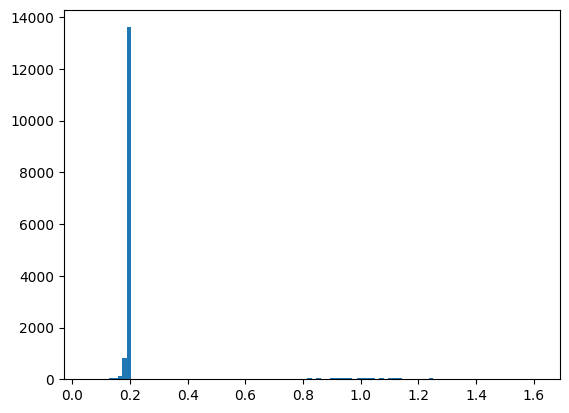

In [11]:
plt.hist(torch.flatten(max_dists).numpy(), bins=100)

In [11]:
centers.shape

torch.Size([64, 64, 3])

In [12]:
x_vis, mask, vis_pos_embeddings = model.forward_encoder(
    patches, centers
)

In [13]:
x_vis.shape

torch.Size([64, 26, 384])

In [14]:
mask.shape

torch.Size([64, 64])

In [15]:
vis_pos_embeddings.shape

torch.Size([64, 26, 384])

In [16]:
from tlspt.models.utils import get_masked, get_unmasked
masked_centers = get_masked(centers, mask)
masked_pos_embeddings = model.pos_encoder(masked_centers)

In [17]:
masked_centers.shape

torch.Size([64, 38, 3])

In [18]:
masked_pos_embeddings.shape

torch.Size([64, 38, 384])

In [19]:
B, N, _ = masked_pos_embeddings.shape
mask_tokens = model.mask_token.expand(B, N, -1)

In [20]:
mask_tokens = model.mask_token.expand(B, N, -1)

In [21]:
x_full = torch.cat((x_vis, mask_tokens), dim=1)

In [22]:
x_full.shape

torch.Size([64, 64, 384])

In [23]:
full_pos_embeddings = torch.cat((vis_pos_embeddings, masked_pos_embeddings), dim=1)

In [24]:
full_pos_embeddings.shape

torch.Size([64, 64, 384])

In [25]:
x_hat = model.forward_decoder(x_full, full_pos_embeddings, N)

In [26]:
x_hat.shape

torch.Size([64, 38, 32, 3])

In [27]:
x_gt = get_masked(patches, mask)

In [28]:
x_gt.shape

torch.Size([64, 38, 32, 3])

In [29]:
loss = model.get_loss(x_hat, x_gt)

In [30]:
loss

tensor(0.9000, grad_fn=<DivBackward0>)

In [31]:
centers

tensor([[[-0.3625,  0.0773, -0.1450],
         [ 1.0000, -0.0927, -0.5904],
         [-0.3058, -0.9361,  0.6022],
         ...,
         [-0.3539,  0.4404,  0.3819],
         [-0.3656,  0.1331, -0.4204],
         [-0.3314, -0.4038,  0.5712]],

        [[-0.4793,  0.0144, -0.0658],
         [ 0.6459,  0.9349,  0.7014],
         [ 0.6856, -0.3177,  0.2242],
         ...,
         [-0.1582, -0.1870, -0.7075],
         [-0.6625,  0.0046,  0.0989],
         [-0.2793,  0.1321,  0.0163]],

        [[ 0.4267,  0.1711,  0.2302],
         [-0.7963, -0.2773, -0.6985],
         [-0.6421,  0.2076,  0.2361],
         ...,
         [ 0.9376, -0.0160,  0.2396],
         [ 0.4856,  0.0040,  0.0501],
         [-0.7986,  0.1264,  0.1726]],

        ...,

        [[-0.1382, -0.0651, -0.9994],
         [ 0.1280, -0.0718,  0.4804],
         [-0.2912,  0.1093, -0.1408],
         ...,
         [ 0.0252, -0.2640, -0.0331],
         [ 0.1164,  0.0971, -0.0104],
         [-0.1553,  0.0181,  0.1579]],

        [[

In [32]:
mask = model.mask_generator(centers)
vis_centers = get_unmasked(centers, mask)
vis_patches = get_unmasked(patches, mask)

In [33]:
vis_patch_embeddings = model.patch_encoder(vis_patches)

In [34]:
x = vis_patches
#bs, g, n, _ = vis_patches.shape
#x = x.reshape(bs*g, n, 3)
#y = model.patch_encoder.conv1(x.transpose(2,1))
#print(y.shape)

In [35]:
x

tensor([[[[ 0.0000e+00,  0.0000e+00,  0.0000e+00],
          [-3.6157e-01,  8.5350e-02,  4.2603e-01],
          [-5.9667e-01, -1.3113e-01,  1.5050e-01],
          ...,
          [-6.0055e-01, -1.0940e-01,  3.9572e-01],
          [-6.5796e-01,  3.1734e-01,  3.5707e-02],
          [-6.3546e-01, -2.7777e-01,  2.4673e-01]],

         [[ 0.0000e+00,  0.0000e+00,  0.0000e+00],
          [ 1.5524e-03,  4.6558e-03,  6.1280e-02],
          [-3.7242e-02, -3.6467e-02,  3.6465e-02],
          ...,
          [-1.0785e-01, -1.0164e-01,  9.2347e-02],
          [-6.8279e-02, -1.7069e-02,  1.6139e-01],
          [-2.3279e-03, -1.5673e-01,  8.1454e-02]],

         [[ 0.0000e+00,  0.0000e+00,  0.0000e+00],
          [-5.8192e-02,  1.1949e-01,  2.1576e-01],
          [-1.2026e-01,  1.4975e-01,  2.0098e-01],
          ...,
          [-1.2026e-01,  1.3889e-01,  3.3444e-01],
          [-5.9744e-02,  1.7458e-01,  3.3756e-01],
          [ 2.8708e-01,  2.3355e-01, -1.0703e-01]],

         ...,

         [[ 0.00

In [36]:
model.patch_encoder.conv1

Sequential(
  (0): Conv1d(3, 128, kernel_size=(1,), stride=(1,))
  (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): Conv1d(128, 256, kernel_size=(1,), stride=(1,))
)

In [37]:
patches

tensor([[[[ 0.0000e+00,  0.0000e+00,  0.0000e+00],
          [ 7.7695e-04, -4.7331e-02, -9.2820e-03],
          [ 3.1812e-02,  7.7590e-02, -1.5154e-03],
          ...,
          [ 1.0863e-02,  1.0242e-01,  2.0250e-01],
          [ 9.6988e-02,  2.8709e-02,  2.0411e-01],
          [ 2.4053e-02,  2.3278e-02, -2.2580e-01]],

         [[ 0.0000e+00,  0.0000e+00,  0.0000e+00],
          [-3.6157e-01,  8.5350e-02,  4.2603e-01],
          [-5.9667e-01, -1.3113e-01,  1.5050e-01],
          ...,
          [-6.0055e-01, -1.0940e-01,  3.9572e-01],
          [-6.5796e-01,  3.1734e-01,  3.5707e-02],
          [-6.3546e-01, -2.7777e-01,  2.4673e-01]],

         [[ 0.0000e+00,  0.0000e+00,  0.0000e+00],
          [-1.2414e-02,  6.1297e-02,  7.5769e-04],
          [ 7.2935e-02,  2.6381e-02,  1.6102e-03],
          ...,
          [ 4.8106e-02,  1.9553e-01, -1.8233e-01],
          [ 8.3022e-02,  2.2501e-01, -1.3421e-01],
          [ 2.2113e-01,  1.0707e-01, -1.2493e-01]],

         ...,

         [[ 0.00

In [38]:
torch.isnan(patches).any()

tensor(False)

In [39]:
x.max() 

tensor(0.9997)

In [40]:
from pytorch3d.ops import knn_points, sample_farthest_points

centers, center_idxs = sample_farthest_points(batch['points'], K=64)

In [41]:
print(torch.isnan(centers[60]).any())


tensor(False)


In [42]:
centers[60]

tensor([[ 2.0811e-01, -1.8339e-01, -2.9808e-01],
        [-2.4059e-01,  6.5399e-01,  9.7969e-01],
        [-3.7908e-01,  3.5025e-01,  4.4444e-02],
        [-1.7504e-01, -9.5245e-01, -3.2393e-01],
        [-3.6430e-01, -1.3815e-01, -3.2485e-01],
        [ 5.9218e-01, -2.8218e-01,  4.2597e-02],
        [-3.8739e-01,  5.0535e-01,  5.6146e-01],
        [ 3.9922e-01, -5.8038e-01, -3.1101e-01],
        [-2.3320e-01, -1.8524e-01,  6.5678e-02],
        [ 4.9309e-02, -6.5424e-01, -3.1839e-01],
        [-3.7261e-01, -6.6717e-01, -3.2116e-01],
        [-3.7476e-02,  6.0347e-02, -3.2116e-01],
        [-7.4406e-02,  4.1672e-01,  1.6539e-01],
        [-3.8185e-01,  5.8500e-02, -5.8960e-02],
        [-7.4406e-02, -2.4063e-01, -2.9254e-01],
        [ 4.2138e-01, -3.2649e-01, -1.8083e-01],
        [ 2.3119e-01, -7.6293e-02, -4.6957e-02],
        [-3.8369e-01,  6.4014e-01,  7.7104e-01],
        [-1.5750e-01,  2.1453e-01,  6.2908e-02],
        [ 2.0257e-01, -4.2436e-01, -3.0824e-01],
        [-1.5934e-01

In [43]:
batch['points'][60]

tensor([[ 0.2081, -0.1834, -0.2981],
        [-0.2406,  0.6540,  0.9797],
        [-0.3791,  0.3502,  0.0444],
        ...,
        [ 0.2875, -0.1418, -0.1273],
        [ 0.5285, -0.2619,  0.0020],
        [-0.2517,  0.2210, -0.0562]])

In [44]:
num_print = 10
for i, item in enumerate(merged_dataset):
    if torch.isnan(item['points']).any():
        print(i)
        num_print -= 1
    if num_print == 0:
        break

In [45]:
merged_dataset[28]

{'points': tensor([[-0.3783, -0.2064,  0.6141],
         [ 0.9990,  0.8653, -0.9120],
         [-0.8178,  0.7641, -0.9051],
         ...,
         [-0.1808,  0.0496,  0.5665],
         [ 0.6696,  0.6827, -0.2621],
         [-0.3257, -0.5169,  0.5576]])}

In [46]:
a, b = merged_dataset.idxs[205]
print(a, b)

0 205


In [47]:
merged_dataset.datasets[a][b]

{'points': tensor([[ 0.6152, -0.4331,  0.0637],
         [-0.6954,  0.6961, -0.7228],
         [-0.7473,  0.4400,  0.9596],
         ...,
         [-0.7200,  0.4901, -0.6453],
         [ 0.9105, -0.4331, -0.1359],
         [ 0.9087, -0.3739, -0.3974]])}

In [48]:
merged_dataset.datasets[a].files_to_load[b]

['/home/matt/work/tlsPT/data/plot_octrees/allen-finland/octrees/FIN02_1,5m/voxels/06e5bddb0047c986.ply']

In [ ]:
len(merged_dataset.datasets[0])

In [ ]:
len(merged_dataset)